In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados do arquivo CSV
data = pd.read_csv('/content/drive/MyDrive/DatasetCreditCardFraud/card_transdata.csv')

# Exemplo de pré-processamento
# Não é necessário muito tratamento pois o dataset já vem limpo
def preprocess_data(data):
    # Separar o conjunto de características (X) e o alvo (y)
    X = data.drop('fraud', axis=1)  # 'fraud' é o rótulo de destino
    y = data['fraud']

    # Normalizar as características numéricas
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y

# Pré-processar os dados
X, y = preprocess_data(data)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# debug
# print(X_train.shape)
# Usar 7 passos de tempo (igual ao número de features)
timesteps = 7  # O número de passos de tempo será igual ao número de features
n_features = 1  # Cada passo terá apenas 1 feature

# Ajustar o formato dos dados para GRU
X_train = X_train.reshape((X_train.shape[0], timesteps, n_features))
X_test = X_test.reshape((X_test.shape[0], timesteps, n_features))


# Criando o modelo RNN com GRU
model = Sequential()

# Adicionando as camadas GRU
model.add(GRU(units=64, activation='tanh', return_sequences=True, input_shape=(10, X_train.shape[2])))
model.add(Dropout(0.2))

model.add(GRU(units=32, activation='tanh'))
model.add(Dropout(0.2))

# Adicionando camada de normalização e densa
model.add(BatchNormalization())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))

# Adicionando a camada de saída
model.add(Dense(units=1, activation='sigmoid'))

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Avaliação do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {test_loss}, Accuracy: {test_accuracy}")

# Previsões no conjunto de teste
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Exatidão: {accuracy}")
print(f"Precisão: {precision}")
print(f"Revocação: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

# Salvar o modelo treinado
model.save('/content/drive/MyDrive/DatasetCreditCardFraud/fraud_detection_gru_model.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 145s 7ms/step - accuracy: 0.9807 - loss: 0.0498 - val_accuracy: 0.9979 - val_loss: 0.0060
Epoch 2/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 129s 6ms/step - accuracy: 0.9963 - loss: 0.0098 - val_accuracy: 0.9987 - val_loss: 0.0041
Epoch 3/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 143s 6ms/step - accuracy: 0.9975 - loss: 0.0069 - val_accuracy: 0.9983 - val_loss: 0.0038
Epoch 4/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 141s 6ms/step - accuracy: 0.9981 - loss: 0.0056 - val_accuracy: 0.9973 - val_loss: 0.0076
Epoch 5/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 142s 6ms/step - accuracy: 0.9983 - loss: 0.0048 - val_accuracy: 0.9982 - val_loss: 0.0082
Epoch 6/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 142s 6ms/step - accuracy: 0.9986 - loss: 0.0044 - val_accuracy: 0.9993 - val_loss: 0.0018
Epoch 7/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 144s 7ms/step - accuracy: 0.9987 - loss: 0.0038 - val_accuracy: 0.9992 - val_loss: 0.0025
Epoch 8/20
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 141s 7ms/step - ac

Exatidão: 0.99855
Precisão: 0.9984888113920372
Revocação: 0.9848649888207304
F1 Score: 0.9916301085199722
ROC AUC Score: 0.9923612837747828


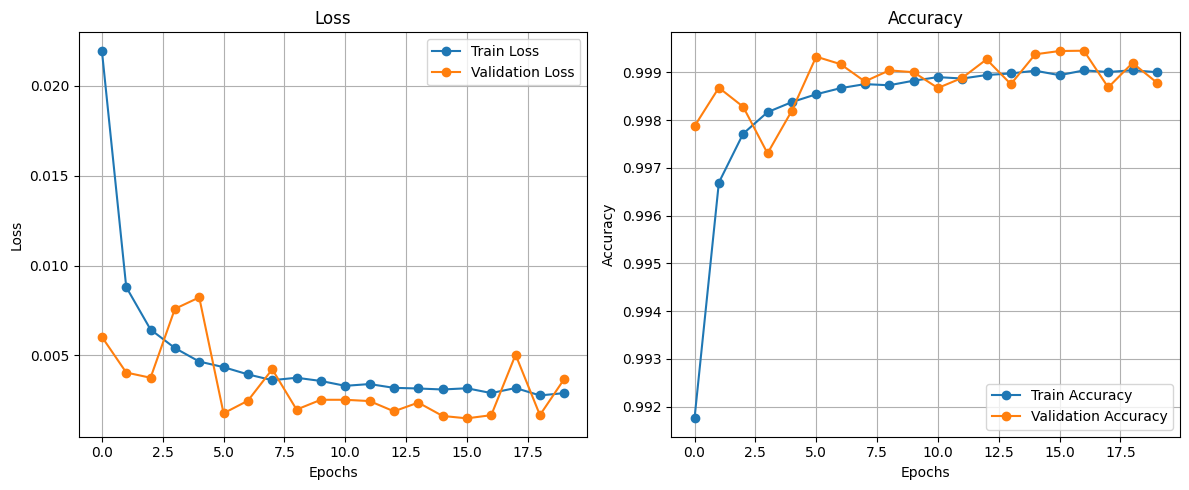

In [ ]:
# Recuperar valores de loss e accuracy do histórico
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Criar o gráfico de Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Criar o gráfico de Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy', marker='o')
plt.plot(val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Exibir os gráficos
plt.tight_layout()
plt.show()

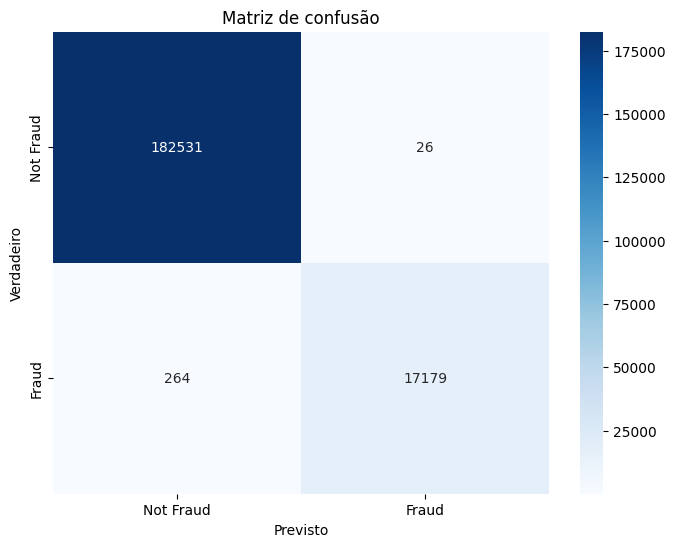

In [ ]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de confusão')
plt.show()

In [6]:
from keras.models import load_model

# Carregar o modelo salvo
model_path = '/content/drive/MyDrive/DatasetCreditCardFraud/fraud_detection_gru_model.h5'
loaded_model = load_model(model_path)

# Fazer previsão em uma amostra aleatória do conjunto de teste
def predict_random_sample(X_test, y_test, model, n_samples=5):
    # Selecionar índices aleatórios do conjunto de teste
    random_indices = np.random.choice(len(X_test), size=n_samples, replace=False)

    # Obter as amostras e os rótulos reais
    X_random = X_test[random_indices]
    y_real = y_test.iloc[random_indices]  # Converter para o formato compatível com Pandas Series

    # Fazer previsões
    y_pred = (model.predict(X_random) > 0.5).astype(int).flatten()

    # Exibir os resultados
    for i in range(n_samples):
        print(f"Amostra {i + 1}:")
        print(f"  Rótulo Real: {y_real.iloc[i]}")
        print(f"  Previsão do Modelo: {y_pred[i]}")
        print("-" * 30)

# Chamar a função para previsões aleatórias
predict_random_sample(X_test, y_test, loaded_model, n_samples=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
Amostra 1:
  Rótulo Real: 0.0
  Previsão do Modelo: 0
------------------------------
Amostra 2:
  Rótulo Real: 0.0
  Previsão do Modelo: 0
------------------------------
Amostra 3:
  Rótulo Real: 0.0
  Previsão do Modelo: 0
------------------------------
Amostra 4:
  Rótulo Real: 1.0
  Previsão do Modelo: 1
------------------------------
Amostra 5:
  Rótulo Real: 0.0
  Previsão do Modelo: 0
------------------------------
